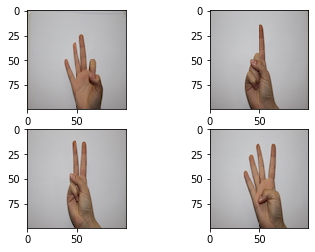

In [12]:
import matplotlib.pyplot as plt
import imageio
location = "/opt/projects/ML_DL_py_TF/Chapter11_CNN/Datasets/Sign_Language_Digits/Sign-Language-Digits-Dataset-master/Dataset/"
fig, ax = plt.subplots(2,2)

i = random.randint(0,9)
img_id = 18 + i
img = imageio.imread(location + str(i) + "/IMG_11" + str(img_id) + ".JPG")
ax[0,0].imshow(img)

i = random.randint(0,9)
img_id = 18 + i
img = imageio.imread(location + str(i) + "/IMG_11" + str(img_id) + ".JPG")
ax[0,1].imshow(img)

i = random.randint(0,9)
img_id = 18 + i
img = imageio.imread(location + str(i) + "/IMG_11" + str(img_id) + ".JPG")
ax[1,0].imshow(img)

i = random.randint(0,9)
img_id = 18 + i
img = imageio.imread(location + str(i) + "/IMG_11" + str(img_id) + ".JPG")
ax[1,1].imshow(img)



In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
batch_size = 256
target_size = (100,100)

data_dir = location

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "training")
validation_generator = datagen.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "validation")

Found 3304 images belonging to 10 classes.
Found 820 images belonging to 10 classes.


In [18]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model1 = Sequential()
model1.add(layers.Conv2D(64, (3,3), input_shape = (100,100,1), activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(units=256, activation='relu'))
model1.add(layers.Dense(units=10, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)      

In [24]:
model1.compile(optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
import time
start = time.time()
model1.fit_generator(train_generator,
                    steps_per_epoch= len(train_generator),
                    epochs=50,
                    validation_data= validation_generator,
                    validation_steps=len(validation_generator),
                    verbose=1)
model1.save_weights('m1_sign_language_50epochs.h5')
end = time.time()
print("Execution time is", int(end -start), "seconds")

Epoch 1/50


<ipython-input-24-144284198d9a>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(train_generator,


13/13 [==============================] - 3s 202ms/step - loss: 2.3033 - accuracy: 0.0978 - val_loss: 2.3003 - val_accuracy: 0.1000
Epoch 2/50
13/13 [==============================] - 2s 178ms/step - loss: 2.2980 - accuracy: 0.1186 - val_loss: 2.2975 - val_accuracy: 0.1000
Epoch 3/50
13/13 [==============================] - 2s 177ms/step - loss: 2.2928 - accuracy: 0.1332 - val_loss: 2.2923 - val_accuracy: 0.1537
Epoch 4/50
13/13 [==============================] - 2s 168ms/step - loss: 2.2825 - accuracy: 0.1628 - val_loss: 2.2833 - val_accuracy: 0.2683
Epoch 5/50
13/13 [==============================] - 2s 181ms/step - loss: 2.2628 - accuracy: 0.3232 - val_loss: 2.2625 - val_accuracy: 0.3098
Epoch 6/50
13/13 [==============================] - 2s 178ms/step - loss: 2.2129 - accuracy: 0.3027 - val_loss: 2.1982 - val_accuracy: 0.4024
Epoch 7/50
13/13 [==============================] - 2s 177ms/step - loss: 2.0482 - accuracy: 0.3702 - val_loss: 1.9758 - val_accuracy: 0.3390
Epoch 8/50
13/13 

In [46]:
batch_size2 = 128
target_size2 = (64,64)
train_generator2 = datagen.flow_from_directory(data_dir, target_size=target_size2, batch_size=batch_size2, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "training")
validation_generator2 = datagen.flow_from_directory(data_dir, target_size=target_size2, batch_size=batch_size2, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "validation")
model2 = Sequential()
model2.add(layers.Conv2D(16, (3,3), input_shape = (64,64,1), activation='relu'))
model2.add(layers.Conv2D(32, (3,3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(units=32, activation='relu'))
model2.add(layers.Dense(units=10, activation='softmax'))
model2.summary()

Found 3304 images belonging to 10 classes.
Found 820 images belonging to 10 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 16)        160       
                                                                 
 conv2d_37 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None

In [39]:
model2.compile(optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
import time
start = time.time()
model2.fit_generator(train_generator2, steps_per_epoch=len(train_generator2), epochs=50,
                    validation_data=validation_generator2,
                    validation_steps=len(validation_generator2),
                    verbose=1)
model2.save_weights('m2_receptive_field_50epochs.h5')
end = time.time()
print("execution time is", int(end-start), "secs")

Epoch 1/50


<ipython-input-40-dae771c87837>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(train_generator2, steps_per_epoch=len(train_generator2), epochs=50,


13/13 [==============================] - 5s 283ms/step - loss: 2.3023 - accuracy: 0.1102 - val_loss: 2.3018 - val_accuracy: 0.1159
Epoch 2/50
13/13 [==============================] - 2s 184ms/step - loss: 2.3014 - accuracy: 0.1283 - val_loss: 2.3012 - val_accuracy: 0.1402
Epoch 3/50
13/13 [==============================] - 2s 179ms/step - loss: 2.3007 - accuracy: 0.1356 - val_loss: 2.3007 - val_accuracy: 0.1488
Epoch 4/50
13/13 [==============================] - 2s 174ms/step - loss: 2.2998 - accuracy: 0.1301 - val_loss: 2.3002 - val_accuracy: 0.1232
Epoch 5/50
13/13 [==============================] - 2s 182ms/step - loss: 2.2992 - accuracy: 0.1413 - val_loss: 2.2996 - val_accuracy: 0.1659
Epoch 6/50
13/13 [==============================] - 2s 176ms/step - loss: 2.2979 - accuracy: 0.1419 - val_loss: 2.2985 - val_accuracy: 0.1134
Epoch 7/50
13/13 [==============================] - 2s 186ms/step - loss: 2.2963 - accuracy: 0.1907 - val_loss: 2.2972 - val_accuracy: 0.1695
Epoch 8/50
13/13 

In [54]:
# now add dropouts to address overfitting.
batch_size2 = 512
target_size2 = (64,64)
train_generator2 = datagen.flow_from_directory(data_dir, target_size=target_size2, batch_size=batch_size2, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "training")
validation_generator2 = datagen.flow_from_directory(data_dir, target_size=target_size2, batch_size=batch_size2, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "validation")
model2 = Sequential()
model2.add(layers.Conv2D(16, (3,3), input_shape = (64,64,1), activation='relu'))
model2.add(layers.Conv2D(32, (3,3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Flatten())
model2.add(layers.Dense(units=32, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(units=10, activation='softmax'))
model2.summary()

Found 3304 images belonging to 10 classes.
Found 820 images belonging to 10 classes.
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 62, 62, 16)        160       
                                                                 
 conv2d_55 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_57 (Conv2D)          (None

In [57]:
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
history = model2.fit_generator(train_generator2, steps_per_epoch=len(train_generator2), epochs=50,
                    validation_data=validation_generator2,
                    validation_steps=len(validation_generator2),
                    verbose=1)
model2.save_weights('m2_dropout_receptive_field_50epochs.h5')
end = time.time()
print("execution time is", int(end-start), "secs")

<ipython-input-57-40a524f40b85>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(train_generator2, steps_per_epoch=len(train_generator2), epochs=50,


Epoch 1/50
7/7 [==============================] - 3s 379ms/step - loss: 1.8244 - accuracy: 0.3438 - val_loss: 1.9866 - val_accuracy: 0.3927
Epoch 2/50
7/7 [==============================] - 2s 313ms/step - loss: 1.8376 - accuracy: 0.3568 - val_loss: 2.0347 - val_accuracy: 0.3780
Epoch 3/50
7/7 [==============================] - 2s 351ms/step - loss: 1.7890 - accuracy: 0.3762 - val_loss: 1.7594 - val_accuracy: 0.4902
Epoch 4/50
7/7 [==============================] - 2s 309ms/step - loss: 1.6879 - accuracy: 0.4095 - val_loss: 1.6104 - val_accuracy: 0.5512
Epoch 5/50
7/7 [==============================] - 2s 313ms/step - loss: 1.6076 - accuracy: 0.4428 - val_loss: 1.7044 - val_accuracy: 0.4659
Epoch 6/50
7/7 [==============================] - 2s 316ms/step - loss: 1.5301 - accuracy: 0.4616 - val_loss: 1.4574 - val_accuracy: 0.5927
Epoch 7/50
7/7 [==============================] - 2s 310ms/step - loss: 1.4561 - accuracy: 0.4930 - val_loss: 1.3959 - val_accuracy: 0.6073
Epoch 8/50
7/7 [====

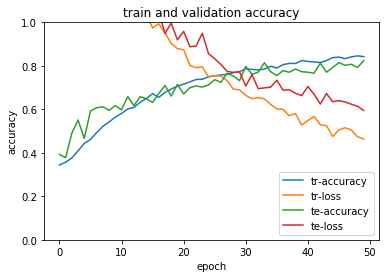

In [59]:
plt.plot(history.history['accuracy'], label='tr-accuracy')
plt.plot(history.history['loss'], label='tr-loss')
plt.plot(history.history['val_accuracy'], label='te-accuracy')
plt.plot(history.history['val_loss'], label='te-loss')
plt.title("train and validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

In [64]:
# now add dropouts & batch normalization
batch_size3 = 128
target_size3 = (64,64)
train_generator3 = datagen.flow_from_directory(data_dir, target_size=target_size3, batch_size=batch_size3, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "training")
validation_generator3 = datagen.flow_from_directory(data_dir, target_size=target_size3, batch_size=batch_size3, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "validation")
model3 = Sequential()
model3.add(layers.Conv2D(16, (3,3), input_shape = (64,64,1), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))
model3.add(layers.Conv2D(16, (3,3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Conv2D(32, (3,3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Conv2D(32, (3,3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))
model3.add(layers.Flatten())
model3.add(layers.Dense(units=16, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(units=10, activation='softmax'))
model3.summary()

Found 3304 images belonging to 10 classes.
Found 820 images belonging to 10 classes.
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 62, 62, 16)        160       
                                                                 
 batch_normalization_14 (Bat  (None, 62, 62, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_32 (Dropout)        (None, 62, 62, 16)        0         
                                                                 
 conv2d_76 (Conv2D)          (None, 60, 60, 16)        2320      
                                                                 
 batch_normalization_15 (Bat  (None, 60, 60, 16)       64        
 chNormalization)                                                
                                  

In [65]:
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.03, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
history3 = model3.fit_generator(train_generator3, steps_per_epoch=len(train_generator3), epochs=200,
                    validation_data=validation_generator3,
                    validation_steps=len(validation_generator3),
                    verbose=1)
model3.save_weights('m3_batchnorm_dropout_receptive_field_200epochs.h5')
end = time.time()
print("execution time is", int(end-start), "secs")

Epoch 1/200


<ipython-input-65-47e5cd928a84>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(train_generator3, steps_per_epoch=len(train_generator3), epochs=200,


26/26 [==============================] - 4s 114ms/step - loss: 2.4684 - accuracy: 0.1338 - val_loss: 2.3626 - val_accuracy: 0.1415
Epoch 2/200
26/26 [==============================] - 2s 92ms/step - loss: 2.0187 - accuracy: 0.2376 - val_loss: 2.5386 - val_accuracy: 0.1024
Epoch 3/200
26/26 [==============================] - 2s 95ms/step - loss: 1.7296 - accuracy: 0.3605 - val_loss: 2.6166 - val_accuracy: 0.1000
Epoch 4/200
26/26 [==============================] - 2s 94ms/step - loss: 1.5866 - accuracy: 0.3904 - val_loss: 4.8654 - val_accuracy: 0.1000
Epoch 5/200
26/26 [==============================] - 2s 94ms/step - loss: 1.4954 - accuracy: 0.4228 - val_loss: 4.4441 - val_accuracy: 0.1000
Epoch 6/200
26/26 [==============================] - 2s 94ms/step - loss: 1.3640 - accuracy: 0.4849 - val_loss: 5.2132 - val_accuracy: 0.1000
Epoch 7/200
26/26 [==============================] - 2s 91ms/step - loss: 1.3439 - accuracy: 0.5124 - val_loss: 5.8392 - val_accuracy: 0.1000
Epoch 8/200
26/26

26/26 [==============================] - 2s 95ms/step - loss: 0.5855 - accuracy: 0.7987 - val_loss: 1.6672 - val_accuracy: 0.6573
Epoch 59/200
26/26 [==============================] - 2s 92ms/step - loss: 0.6166 - accuracy: 0.7942 - val_loss: 1.1189 - val_accuracy: 0.7122
Epoch 60/200
26/26 [==============================] - 2s 92ms/step - loss: 0.6016 - accuracy: 0.7845 - val_loss: 0.9834 - val_accuracy: 0.7415
Epoch 61/200
26/26 [==============================] - 2s 94ms/step - loss: 0.6187 - accuracy: 0.7924 - val_loss: 1.4285 - val_accuracy: 0.6951
Epoch 62/200
26/26 [==============================] - 2s 94ms/step - loss: 0.6038 - accuracy: 0.7939 - val_loss: 2.3207 - val_accuracy: 0.6305
Epoch 63/200
26/26 [==============================] - 2s 95ms/step - loss: 0.5921 - accuracy: 0.7981 - val_loss: 0.9751 - val_accuracy: 0.7537
Epoch 64/200
26/26 [==============================] - 2s 94ms/step - loss: 0.5754 - accuracy: 0.8169 - val_loss: 1.0713 - val_accuracy: 0.7439
Epoch 65/200

26/26 [==============================] - 3s 106ms/step - loss: 0.4991 - accuracy: 0.8366 - val_loss: 1.6162 - val_accuracy: 0.7073
Epoch 116/200
26/26 [==============================] - 2s 95ms/step - loss: 0.4748 - accuracy: 0.8381 - val_loss: 2.6397 - val_accuracy: 0.6610
Epoch 117/200
26/26 [==============================] - 2s 94ms/step - loss: 0.4950 - accuracy: 0.8284 - val_loss: 1.0162 - val_accuracy: 0.7683
Epoch 118/200
26/26 [==============================] - 2s 93ms/step - loss: 0.4998 - accuracy: 0.8341 - val_loss: 1.6781 - val_accuracy: 0.7024
Epoch 119/200
26/26 [==============================] - 3s 97ms/step - loss: 0.4751 - accuracy: 0.8402 - val_loss: 0.7944 - val_accuracy: 0.8000
Epoch 120/200
26/26 [==============================] - 2s 96ms/step - loss: 0.4875 - accuracy: 0.8399 - val_loss: 1.7898 - val_accuracy: 0.6854
Epoch 121/200
26/26 [==============================] - 2s 97ms/step - loss: 0.4950 - accuracy: 0.8287 - val_loss: 1.7818 - val_accuracy: 0.6732
Epoch

Epoch 172/200
26/26 [==============================] - 2s 95ms/step - loss: 0.4746 - accuracy: 0.8472 - val_loss: 2.3346 - val_accuracy: 0.7195
Epoch 173/200
26/26 [==============================] - 2s 93ms/step - loss: 0.4435 - accuracy: 0.8523 - val_loss: 1.2625 - val_accuracy: 0.7659
Epoch 174/200
26/26 [==============================] - 2s 93ms/step - loss: 0.4176 - accuracy: 0.8611 - val_loss: 1.6885 - val_accuracy: 0.7171
Epoch 175/200
26/26 [==============================] - 3s 95ms/step - loss: 0.4233 - accuracy: 0.8584 - val_loss: 0.6828 - val_accuracy: 0.8537
Epoch 176/200
26/26 [==============================] - 3s 97ms/step - loss: 0.4476 - accuracy: 0.8623 - val_loss: 1.1686 - val_accuracy: 0.7854
Epoch 177/200
26/26 [==============================] - 2s 93ms/step - loss: 0.4421 - accuracy: 0.8535 - val_loss: 0.6925 - val_accuracy: 0.8463
Epoch 178/200
26/26 [==============================] - 2s 96ms/step - loss: 0.4557 - accuracy: 0.8535 - val_loss: 0.8199 - val_accuracy:

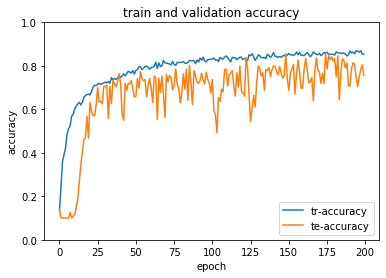

In [68]:
plt.plot(history3.history['accuracy'], label='tr-accuracy')
#plt.plot(history3.history['loss'], label='tr-loss')
plt.plot(history3.history['val_accuracy'], label='te-accuracy')
#plt.plot(history3.history['val_loss'], label='te-loss')
plt.title("train and validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

In [70]:
# now add dropouts & batch normalization & Adam optimizer
batch_size4 = 128
target_size4 = (64,64)
train_generator4 = datagen.flow_from_directory(data_dir, target_size=target_size4, batch_size=batch_size4, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "training")
validation_generator4 = datagen.flow_from_directory(data_dir, target_size=target_size4, batch_size=batch_size4, 
                                              color_mode = 'grayscale',
                                             class_mode = 'categorical',
                                             subset = "validation")
model4 = Sequential()
model4.add(layers.Conv2D(16, (3,3), input_shape = (64,64,1), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.5))
model4.add(layers.Conv2D(16, (3,3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Conv2D(32, (3,3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Conv2D(32, (3,3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Conv2D(64, (3,3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.5))
model4.add(layers.Flatten())
model4.add(layers.Dense(units=16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(units=10, activation='softmax'))
model4.summary()

Found 3304 images belonging to 10 classes.
Found 820 images belonging to 10 classes.
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 62, 62, 16)        160       
                                                                 
 batch_normalization_19 (Bat  (None, 62, 62, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_38 (Dropout)        (None, 62, 62, 16)        0         
                                                                 
 conv2d_81 (Conv2D)          (None, 60, 60, 16)        2320      
                                                                 
 batch_normalization_20 (Bat  (None, 60, 60, 16)       64        
 chNormalization)                                                
                                  

In [71]:
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999), loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
history4 = model4.fit_generator(train_generator4, steps_per_epoch=len(train_generator4), epochs=200,
                    validation_data=validation_generator4,
                    validation_steps=len(validation_generator4),
                    verbose=1)
model4.save_weights('m4_batchnorm_dropout_receptive_field_Adam_200epochs.h5')
end = time.time()
print("execution time is", int(end-start), "secs")

Epoch 1/200


<ipython-input-71-82f1c84d62ac>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(train_generator4, steps_per_epoch=len(train_generator4), epochs=200,


26/26 [==============================] - 3s 103ms/step - loss: 2.4596 - accuracy: 0.1301 - val_loss: 2.6131 - val_accuracy: 0.1000
Epoch 2/200
26/26 [==============================] - 2s 96ms/step - loss: 2.1199 - accuracy: 0.2076 - val_loss: 4.5541 - val_accuracy: 0.1000
Epoch 3/200
26/26 [==============================] - 3s 95ms/step - loss: 1.9524 - accuracy: 0.2673 - val_loss: 8.0195 - val_accuracy: 0.1000
Epoch 4/200
26/26 [==============================] - 2s 96ms/step - loss: 1.7692 - accuracy: 0.3354 - val_loss: 12.8247 - val_accuracy: 0.1000
Epoch 5/200
26/26 [==============================] - 2s 96ms/step - loss: 1.6187 - accuracy: 0.3992 - val_loss: 11.8261 - val_accuracy: 0.1000
Epoch 6/200
26/26 [==============================] - 2s 96ms/step - loss: 1.4394 - accuracy: 0.4570 - val_loss: 12.5143 - val_accuracy: 0.1000
Epoch 7/200
26/26 [==============================] - 2s 93ms/step - loss: 1.3271 - accuracy: 0.4939 - val_loss: 10.3667 - val_accuracy: 0.1000
Epoch 8/200
2

26/26 [==============================] - 2s 96ms/step - loss: 0.4676 - accuracy: 0.8157 - val_loss: 1.0615 - val_accuracy: 0.7000
Epoch 59/200
26/26 [==============================] - 3s 94ms/step - loss: 0.5223 - accuracy: 0.7960 - val_loss: 0.8719 - val_accuracy: 0.7512
Epoch 60/200
26/26 [==============================] - 3s 100ms/step - loss: 0.5031 - accuracy: 0.7984 - val_loss: 0.7368 - val_accuracy: 0.7805
Epoch 61/200
26/26 [==============================] - 3s 99ms/step - loss: 0.4524 - accuracy: 0.8172 - val_loss: 1.1003 - val_accuracy: 0.7244
Epoch 62/200
26/26 [==============================] - 2s 93ms/step - loss: 0.4903 - accuracy: 0.7966 - val_loss: 3.4031 - val_accuracy: 0.5756
Epoch 63/200
26/26 [==============================] - 2s 95ms/step - loss: 0.4685 - accuracy: 0.8063 - val_loss: 1.2040 - val_accuracy: 0.7171
Epoch 64/200
26/26 [==============================] - 3s 95ms/step - loss: 0.4454 - accuracy: 0.8245 - val_loss: 0.7605 - val_accuracy: 0.7707
Epoch 65/20

26/26 [==============================] - 2s 95ms/step - loss: 0.4141 - accuracy: 0.8429 - val_loss: 5.1936 - val_accuracy: 0.5098
Epoch 116/200
26/26 [==============================] - 2s 95ms/step - loss: 0.4095 - accuracy: 0.8447 - val_loss: 1.5548 - val_accuracy: 0.7244
Epoch 117/200
26/26 [==============================] - 3s 97ms/step - loss: 0.4144 - accuracy: 0.8396 - val_loss: 3.3335 - val_accuracy: 0.6024
Epoch 118/200
26/26 [==============================] - 3s 97ms/step - loss: 0.3949 - accuracy: 0.8475 - val_loss: 2.1741 - val_accuracy: 0.6707
Epoch 119/200
26/26 [==============================] - 2s 94ms/step - loss: 0.3813 - accuracy: 0.8544 - val_loss: 1.3568 - val_accuracy: 0.7390
Epoch 120/200
26/26 [==============================] - 2s 94ms/step - loss: 0.4045 - accuracy: 0.8487 - val_loss: 0.7161 - val_accuracy: 0.8268
Epoch 121/200
26/26 [==============================] - 3s 95ms/step - loss: 0.4025 - accuracy: 0.8481 - val_loss: 0.9836 - val_accuracy: 0.7512
Epoch 

Epoch 172/200
26/26 [==============================] - 2s 93ms/step - loss: 0.3655 - accuracy: 0.8541 - val_loss: 3.8788 - val_accuracy: 0.5732
Epoch 173/200
26/26 [==============================] - 2s 95ms/step - loss: 0.3625 - accuracy: 0.8623 - val_loss: 1.4886 - val_accuracy: 0.7195
Epoch 174/200
26/26 [==============================] - 2s 95ms/step - loss: 0.3663 - accuracy: 0.8596 - val_loss: 1.2719 - val_accuracy: 0.7732
Epoch 175/200
26/26 [==============================] - 2s 94ms/step - loss: 0.3853 - accuracy: 0.8529 - val_loss: 1.6610 - val_accuracy: 0.7415
Epoch 176/200
26/26 [==============================] - 2s 92ms/step - loss: 0.3806 - accuracy: 0.8523 - val_loss: 1.2039 - val_accuracy: 0.7683
Epoch 177/200
26/26 [==============================] - 2s 93ms/step - loss: 0.3386 - accuracy: 0.8692 - val_loss: 2.3226 - val_accuracy: 0.6756
Epoch 178/200
26/26 [==============================] - 2s 96ms/step - loss: 0.3718 - accuracy: 0.8605 - val_loss: 1.1291 - val_accuracy:

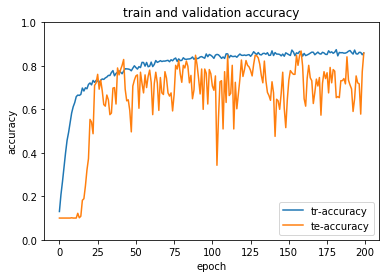

In [72]:
plt.plot(history4.history['accuracy'], label='tr-accuracy')
#plt.plot(history4.history['loss'], label='tr-loss')
plt.plot(history4.history['val_accuracy'], label='te-accuracy')
#plt.plot(history4.history['val_loss'], label='te-loss')
plt.title("train and validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()